## matplotlib api

- 用artist对象在canvas上render图像
  - canvas 底层API，代表画布/绘图区
  - render 底层API，渲染器，绘画工具
  - artist 具体的图表组件

### Artist 的分类
- Primitives - 基本要素，标准图像（二维曲线Line2D，Text，Rectangle，Image）
- Container - 承装Primitives（Figure，Axes，Axis）
  - 这里 Axes 可以理解为是 Figure 的子图


### matplotlib 流程

1. 创建Figure
2. Figure内创建一个或多个 axes / subplot 
3. Axes内创建primitive

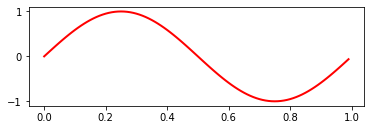

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# step 1 : 创建一个 figure 实例
fig = plt.figure()

# step 2 : 创建一个two rows, one column的绘图区
# 在第一个位置创建新的子图 axes
ax = fig.add_subplot(2, 1, 1) # two rows, one column, first plot

# step 3 : 在Axes内创建Primitives
x = np.arange(0.0, 1.0, 0.01)
y = np.sin(2 * np.pi * x) # sin(2\pi x)
line = ax.plot(x, y, color = 'red', lw = 2) 
# ax.plot returns : A list of lines representing the plotted data.

### 自定义Artist对象
Artist可以分为Primitives和Container
- Primitives 基本要素，标准图像
- Container 承装Primitives
每个

---
```
.alpha   透明度
.axes    所属Axes | None
.figure  所属Figure | None
.label   Text Label
.visible bool，是否可见
```
读写Artist属性 `get_*`和`set_*`函数
```
a = artistObject.get_alpha() # read
artistObject.set_alpha(0.5*a) # write
artistObject.set(alpha = 0.5, zorder = 2) # write
```




(<matplotlib.patches.Rectangle at 0x7ff1106a37f0>,
 <matplotlib.patches.Rectangle at 0x7ff1106534e0>)

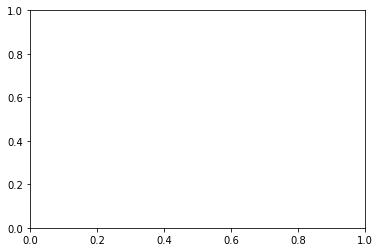

In [ ]:
# .patch [Figure|Axes]代表Figure|Axes的相关属性
plt.figure().patch,plt.axes().patch

In [ ]:
import matplotlib
print(matplotlib.artist.getp(fig.patch)) # 获得所有属性
print(matplotlib.artist.getp(fig,"alpha")) # 获得指定属性

    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = False
    bbox = Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0)
    capstyle = butt
    children = []
    clip_box = None
    clip_on = True
    clip_path = None
    contains = None
    data_transform = BboxTransformTo(     TransformedBbox(         Bbox...
    edgecolor or ec = (1.0, 1.0, 1.0, 0.0)
    extents = Bbox(x0=0.0, y0=0.0, x1=432.0, y1=288.0)
    facecolor or fc = (1.0, 1.0, 1.0, 0.0)
    figure = Figure(432x288)
    fill = True
    gid = None
    hatch = None
    height = 1
    in_layout = False
    joinstyle = miter
    label = 
    linestyle or ls = solid
    linewidth or lw = 0.0
    patch_transform = CompositeGenericTransform(     BboxTransformTo(   ...
    path = Path(array([[0., 0.],        [1., 0.],        [1.,...
    path_effects = []
    picker = None
    rasterized = None
    sketch_params = None
    snap = None
    transform = CompositeGenericTransform(     CompositeGenericTra...
    transfo

### Primitives

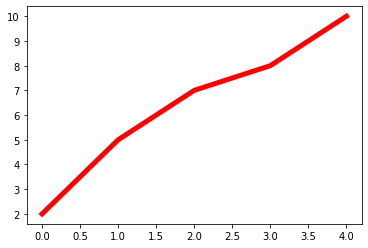

In [ ]:
# Line2D
import matplotlib.pyplot as plt
x = range(0, 5)
y = [2, 5, 7, 8, 10]
plt.plot(x, y, linewidth = 5, color = 'red')

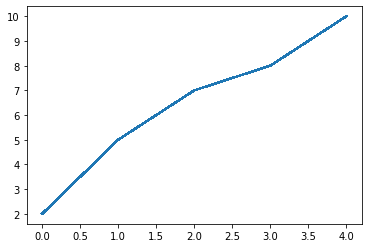

In [ ]:
'''
[notes]
ax.plot() or plt.plot() returns a [tuple] with only one element.
By adding the comma to the assignment target list
You ask python to unpack the return value and assign it to each variable \\
named to the left in turn.

line, = plt.plot(x, y)
      ||
[line] = plt.plot(x, y)
      ||
line = plt.plot(x, y)[0]

References
x, = … - is this trailing comma the comma operator?
https://stackoverflow.com/questions/16037494/x-is-this-trailing-comma-the-comma-operator
'''
line, = plt.plot(x, y, '-') # 获取line对象
line.set_antialiased(False) # 关闭抗锯齿功能

[None, None]

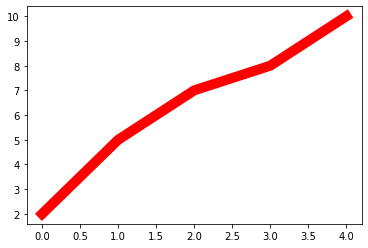

In [ ]:
lines = plt.plot(x, y) # 获取线属性
plt.setp(lines, color = 'r', linewidth = 10) # setp()函数设置属性

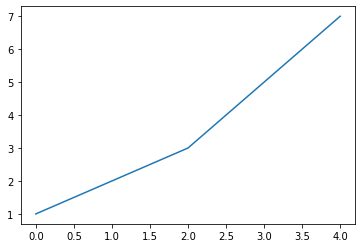

In [ ]:
'''
绘制lines
1. pyplot
2. Line2D (fig, ax)
'''
# pyplot
import matplotlib.pyplot as plt
x = range(0, 5)
y = [1,2,3,5,7]
plt.plot(x,y)

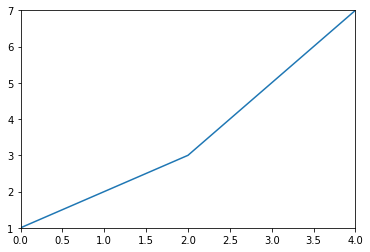

In [ ]:
# Line2D
from matplotlib.lines import Line2D

fig = plt.figure()
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
line = Line2D(x, y)
ax.add_line(line)
ax.set_xlim(min(x), max(x)) # Set the x-axis view limits
ax.set_ylim(min(y), max(y)) # Set the y-axis view limits

plt.show()

<ErrorbarContainer object of 3 artists>

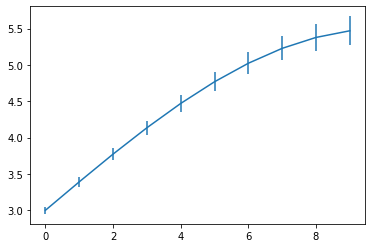

In [ ]:
'''
Error bar
- Error bars are graphical representations of the variability of data 
and used on graphs to indicate the error or uncertainty in a reported 
measurement.
'''

import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
x = np.arange(10)
# return evenly spaced values with a given interval
y = 2.5 * np.sin(x / 20 * np.pi) # sin(\frac{\pi x}{20})
yerr = np.linspace(0.05, 0.2, 10)
# Return evenly spaced numbers over a specified interval.
plt.errorbar(x, y+3, yerr=yerr, label = 'both limits(default)')
# yerr 指定 y轴的误差

(0.0, 100.0)

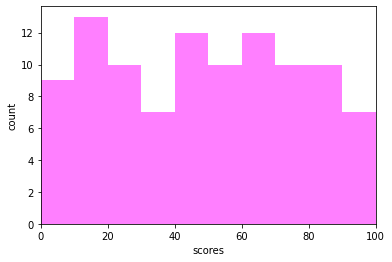

In [ ]:
'''
Rectangle
- class matplotlib.patches.Rectangle(xy, width, height, angle = 0.0, **kwargs)
Categories
1. hist - 直方图
2. bar - 柱状图
'''
# Hist
import matplotlib.pyplot as plt
import numpy as np
x = np.random.randint(0, 100, 100)
# return random integers from [low,high)
bins = np.arange(0, 101, 10) # 直方图的边界值/分布区间
# [0,10], [10, 20] ...
plt.hist(x, bins, color = 'fuchsia', alpha = 0.5) # Transparency
plt.xlabel('scores')
plt.ylabel('count')
plt.xlim(0, 100) # Set the x-axis view limits

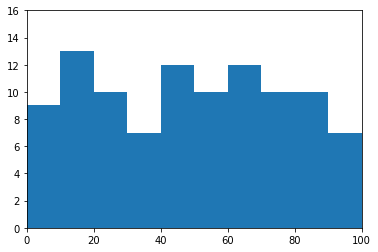

In [ ]:
# class Rectangle => Hist
# [notes]
import pandas as pd
import re
df = pd.DataFrame(columns = ['data'])
df.loc[:, 'data'] = x # 对 data column 赋值 x
df['boxes'] = pd.cut(df['data'], bins = bins, right = False, 
                   include_lowest = True) 
# 按bins为边界值对数据进行分箱，存储到df['pkt']中
# 区间左闭右开[)，包含最小值

df_cnt = df['boxes'].value_counts().reset_index()
# 统计区间个数，加index列
df_cnt.loc[:,'mini'] = df_cnt['index'].astype(str).map(lambda x:re.findall('\[(.*)\,',x)[0]).astype(int)
df_cnt.loc[:,'maxi'] = df_cnt['index'].astype(str).map(lambda x:re.findall('\,(.*)\)',x)[0]).astype(int)
df_cnt.loc[:,'width'] = df_cnt['maxi']- df_cnt['mini']
df_cnt.sort_values('mini', ascending = True, inplace = True)
df_cnt.reset_index(inplace = True, drop = True)

# Rectangle 绘制 hist
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111) # one row, one column, first plot

for i in df_cnt.index:
    rect =  plt.Rectangle((df_cnt.loc[i,'mini'],0),
                          df_cnt.loc[i,'width'],df_cnt.loc[i,'boxes'])
    ax1.add_patch(rect)
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 16)
plt.show()

<BarContainer object of 16 artists>

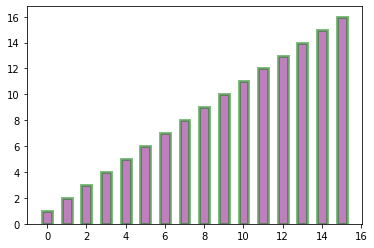

In [ ]:
'''
bar 柱状图
'''

# bar
import matplotlib.pyplot as plt
y = range(1,17)
plt.bar(np.arange(16), 
        y, 
        alpha=0.5, 
        width=0.5, 
        color='purple', 
        edgecolor='green', 
        label='The First Bar', 
        lw=3 # linewidth
        )

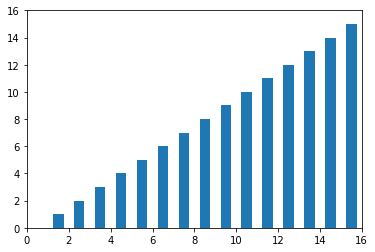

In [ ]:
# class Rectangle => bar
fig = plt.figure()
ax1 = fig.add_subplot(111) # one row, one column, first plot

for i in range(1, 17):
  rect = plt.Rectangle((i + 0.25, 0), 0.5 ,i)
  # Ractangle((x, y), width, height)
  ax1.add_patch(rect)

ax1.set_xlim(0, 16)
ax1.set_ylim(0, 16)
plt.show()

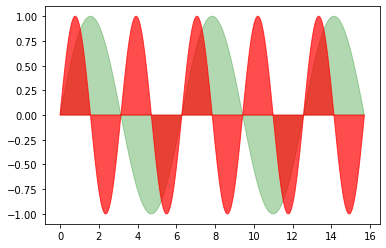

In [ ]:
'''
Polygon
class matplotlib.patches.Polygon(xy, closed = True, **kwargs)
- xy 是一个Nx2的Numpy Array，为Polygon的顶点
- closed = True，指定多边形将起点和终点重合
'''
import matplotlib.pyplot as plt
x = np.linspace(0, 5 * np.pi, 1000) # 1000 points in [0,5\pi]
y1 = np.sin(x)
y2 = np.sin(2 * x)
plt.fill(x, y1, color = 'green', alpha = 0.3)
plt.fill(x, y2, color = 'red', alpha = 0.7)

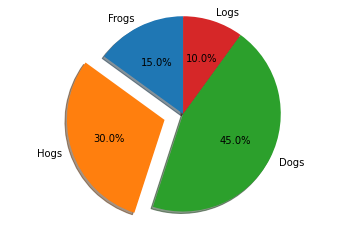

In [ ]:
'''
Wedge - 契形
- 常见作用：绘制饼状图 pie
'''
import matplotlib.pyplot as plt
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = [0, 0.2, 0, 0] 
# If not None, is a len(x) array which specifies the fraction
# of the radius with which to offset each wedge.
# 数值越高，饼状图中Hogs离中心越远
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, 
        autopct = '%1.1f%%', 
        shadow = True,
        startangle = 90) # star angle
ax1.axis('equal')
plt.show()

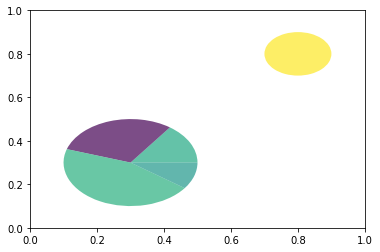

In [ ]:
# class wedge => pie
import matplotlib.pyplot as plt 
from matplotlib.patches import Circle, Wedge
from matplotlib.collections import PatchCollection

fig = plt.figure()
ax1 = fig.add_subplot(111)
theta1 = 0
sizes = [15, 30, 45, 10]
patches = []
# Wedge(center, radius, theta1, theta2)
# 以(x,y)为中心，半径为r，从\theta_1 扫到 \theta_2
patches += [
            Wedge((0.3, 0.3), .2, 0, 54),
            Wedge((0.3, 0.3), .2, 54, 162),
            Wedge((0.3, 0.3), .2, 162, 324),
            Wedge((0.3, 0.3), .2, 324, 360), # Pie before this line
            Wedge((0.8, 0.8), .1, 0, 360) # Full Circle
]
colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches, alpha = 0.7)
p.set_array(colors)
ax1.add_collection(p)
plt.show()

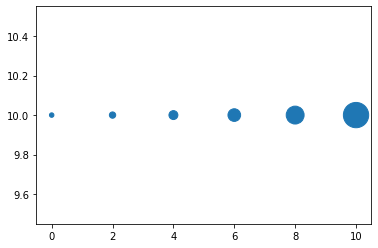

In [ ]:
'''
collections - 一组对象的集合
子类
PathCollection - 散点图
method -> scatter
'''
x = [0, 2, 4, 6, 8, 10]
y = [10] * len(x)
s = [20*2**n for n in range(len(x))]
plt.scatter(x, y, s = s)
# x, y 数据点位置
# s 尺寸大小
plt.show()

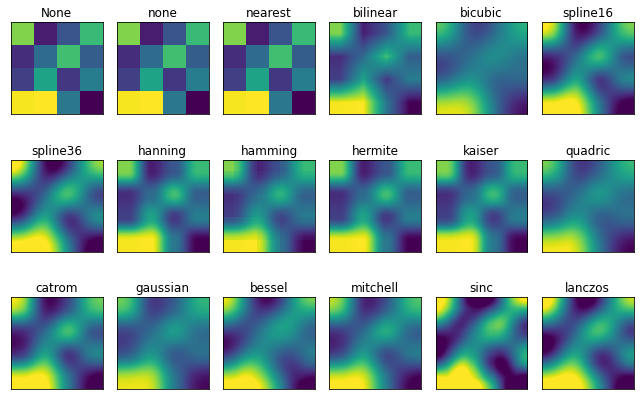

In [ ]:
'''
Images - 绘制image图像的类
imshow() 将数组绘制成图像

[notes]
'''
import matplotlib.pyplot as plt
import numpy as np
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows = 3, ncols = 6, figsize = (9, 6),
                        subplot_kw = {'xticks':[], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
  ax.imshow(grid, interpolation = interp_method, cmap = 'viridis')
  ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()

### 对象容器 - Object Container

Container会包含一些`primitives`，并且Container有自身的属性
  - 例如Axes Artist，作为Container，可以包含Primitives 例如 Line2D, Text，
  - 同时，也有自身的属性，比如`xscal`，用来控制X轴是`linear`还是`log`


AxesSubplot(0.125,0.536818;0.775x0.343182)
[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1035eec18>, <matplotlib.axes._axes.Axes object at 0x7ff101cb5b38>]


(None, None)

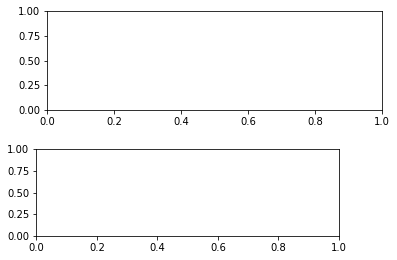

In [ ]:
'''
Figure Container
1. 一张图标的背景就是在Figure.patch的一个Rectangle
2. Attributes
  Figure.patch - Figure 的背景Rectangle
  Figure.axes - Axes instantce的列表（包含subplot）
  Figure.images - Figure Images Patch列表
  Figure.lines - Line2D实例的列表（很少使用）
  FIgure.legends - Figure Legends列表（不同于Axes.legends）
  Figure.texts - Figure Text列表
'''
fig = plt.figure()
ax1 = fig.add_subplot(211) # 2 rows, 1 column, first plot
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3]) # (left, bottom, width, height)
print(ax1),print(fig.axes) # fig.axes 中包含了subplot和axes两个instantce

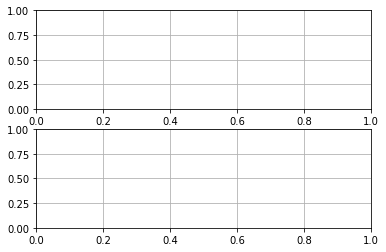

In [ ]:
# Traverse [axes] to modify the attribute

fig = plt.figure()
ax1 = fig.add_subplot(211) # 2 rows, 1 col, first plot
ax2 = fig.add_subplot(212)
for ax in fig.axes:
  ax.grid(True)

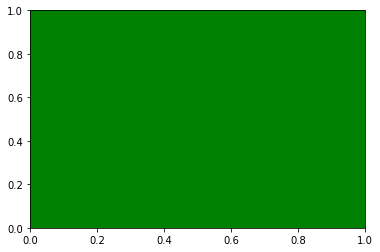

In [ ]:
'''
Axes Container
1. Artist存放于Axes内部
2. Axes的patch属性
  - 对于笛卡尔坐标系 => Rectangle
  - 对于极坐标而言 => Circle
'''
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

fig = plt.figure()
ax = fig.add_subplot(111) # 1 rows, 1 cols, first plot
rect = ax.patch # axes'patch => rectangle
rect.set_facecolor('green')

Axis Container
1. 处理和坐标轴相关的绘图行为
2. tick line | grid line | tick label | axis label
   刻度线 | 刻度label | 坐标网络 | 坐标轴标题
3. data_interval, view_interval => 自适应，平移和缩放

 获取刻度线位置 [-0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5] 
 获取刻度label列表 <a list of 11 Text major ticklabel objects> 
 获取刻度线列表 <a list of 22 Line2D ticklines objects> 
 获取轴刻度间隔 [0. 4.] 
 获取轴视角（位置）的间隔 [-0.2  4.2]


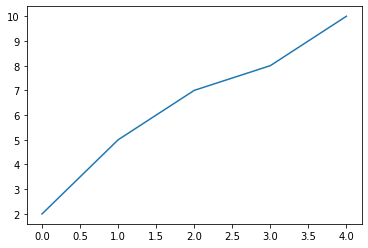

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

fig, ax = plt.subplots()
x = range(0, 5)
y = [2,5,7,8,10]
plt.plot(x, y, '-')

axis = ax.xaxis # axis 为x轴对象
print(' 获取刻度线位置',axis.get_ticklocs(),'\n'
      ' 获取刻度label列表',axis.get_ticklabels(),'\n'
      ' 获取刻度线列表', axis.get_ticklines(),'\n',
      '获取轴刻度间隔', axis.get_data_interval(), '\n',
      '获取轴视角（位置）的间隔', axis.get_view_interval())

下面的例子展示了如何调整一些轴和刻度的属性

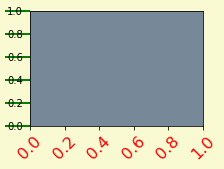

In [ ]:
fig = plt.figure()
rect = fig.patch
rect.set_facecolor('lightgoldenrodyellow') # figure浅黄色

ax1 = fig.add_axes([0.1, 0.3, 0.4, 0.4]) # (x, y) = (0.1, 0.3), width = 0.4, height = 0.4
rect = ax1.patch
rect.set_facecolor('lightslategray') # ax1矩形灰色

for label in ax1.xaxis.get_ticklabels():
  # 调用x轴刻度标签实例，改变文字属性 ticklabels => Text Instance
  label.set_color('red')
  label.set_rotation(45)
  label.set_fontsize(16)

for line in ax1.yaxis.get_ticklines():
  # 调用y轴刻度线条实例，ticklines => Line2D Instantce
  line.set_color('green')
  line.set_markersize(25)     # marker 大小
  line.set_markeredgewidth(2) # marker 粗细

plt.show()

## Tick Container
1. `matplotlib.axis.Tick`是粒度最低的Container
2. 包含轴相关的设置，具体而言，包含`tick`,`grid line`,`label`等
3. 该Container涉及的相关属性中，x轴的tick1对应左侧轴，x轴的tick2对应右侧轴
4. y轴的tick1对应右侧轴，y轴的tick2对应上侧轴

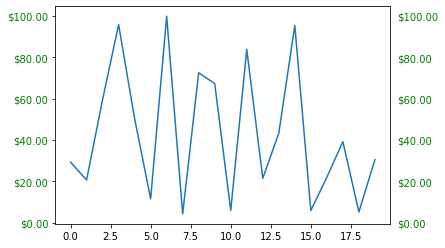

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots()
ax.plot(100*np.random.rand(20))

# ticker
formatter = matplotlib.ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)

# ticker => 将主轴由左侧轴改为右侧轴，颜色为绿色
ax.yaxis.set_tick_params(which = 'major', labelcolor = 'green',
                         labelleft = True, labelright = True)
# labelleft  控制左侧轴是否显示
# labelright 控制右侧轴是否显示
plt.show()

### 思考题
1. primitives 和 container 的区别和联系是什么？
2. 四个容易的联系和区别是什么？他们分别控制一张图表的哪些要素？

### 绘图题
1. 教程中展示的案例都是单一图，请自行创建数组，画出包含六个子图的线图，要求：
  - 子图的排布是 2 x 3
  - 线图可用教程中 Line2D 方法绘制
  - 需要设置每个子图的横坐标和纵坐标刻度
  - 设置整个图的标题，横坐标名称，纵坐标名称


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


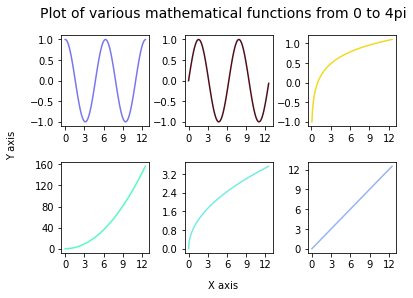

In [79]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import random
import sys

fig, axs = plt.subplots(nrows = 2, ncols = 3)
x = np.arange(0, 4 * np.pi, 0.1)
ys = [np.cos(x), np.sin(x), np.log10(x), x**2, x**0.5, x]
for i in range(6):
  rows = i // 3
  cols = i % 3
  r, g, b = random.random(), random.random(), random.random()
  axs[rows, cols].plot(x, ys[i], c = (r, g, b))
  axs[rows, cols].xaxis.set_major_locator(ticker.MaxNLocator(5))
  axs[rows, cols].yaxis.set_major_locator(ticker.MaxNLocator(5))

fig.suptitle('Plot of various mathematical functions from 0 to 4pi', fontsize = 14)
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
fig.text(0.5, 0, 'X axis', ha = 'center')
fig.text(0, 0.5, 'Y axis', va = 'center', rotation = 'vertical')

plt.show()

2. 分别用一组长方形柱和填充面积的方式模仿画出下图，函数 $y= -1*(x-2)*(x-8) + 10$，在区间 [2,9] 的积分面积